In [1]:
#Shishir Khanal
#July 9, 2025
#Recurrent Neural Network

In [2]:
#For trajectory 
#Cells that are function of previous time steps are also known as memory cells
#RNN are also flexible in their inputs and outputs, for both sequences and single vector values

In [3]:
#Types
#1. Sequence to Sequence
#2. Sequence to Vector -> Paragraph of Words to sentiment(Liked/Disliked (0/1))

In [4]:
#LSTM
#RNN tend to forget first inputs later, so LSTM can overcome this issue

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Alcohol_Sales.csv',index_col='DATE', parse_dates=True)
df.index.freq='MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


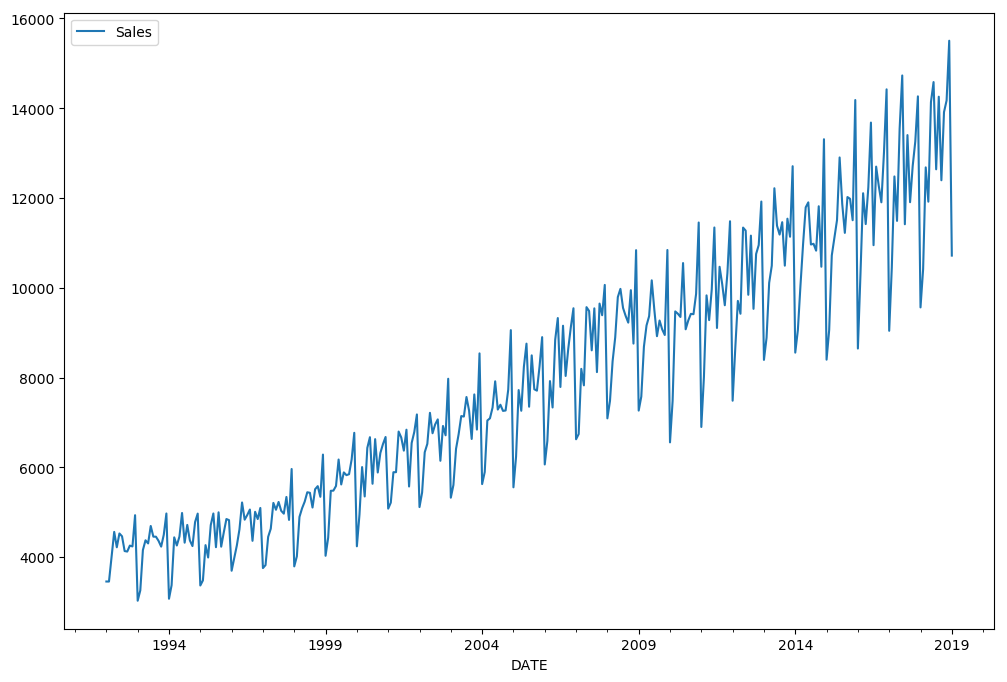

In [3]:
df.columns = ['Sales']
df.plot(figsize=(12,8))

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

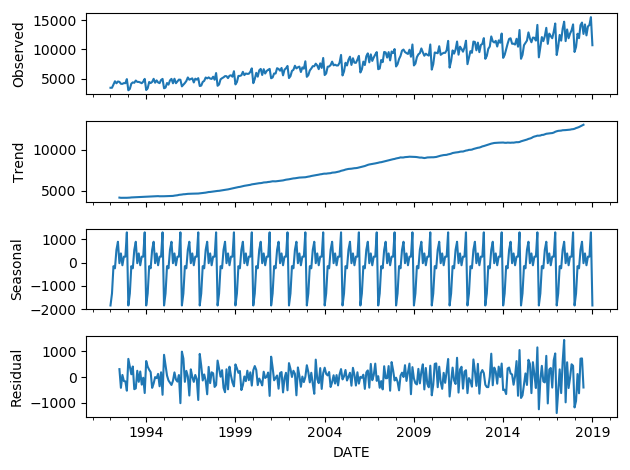

In [5]:
results = seasonal_decompose(df['Sales'])
results.plot();

In [6]:
#results.seasonal.plot()

In [7]:
len(df)

325

In [8]:
train = df.iloc[:313]
test = df.iloc[313:]

In [9]:
#to normalize a series (ser / ser.max())

In [10]:
from sklearn.preprocessing import MinMaxScaler

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(train) # finds the max value in the train data

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [16]:
n_input = 3
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [17]:
len(scaled_train)

313

In [18]:
len(generator)

310

In [19]:
X,y = generator[0]

In [20]:
X
#tested object # first n_input elements from scaled_train

array([[[0.03658432],
        [0.03649885],
        [0.08299855]]])

In [21]:
y
#predicted object

array([[0.13103684]])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
n_input = 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [24]:
model = Sequential()

model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit_generator(train_generator,epochs=25)

Epoch 1/25
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2025-07-10 02:20:23.686273: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-07-10 02:20:23.691437: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2994595000 Hz
2025-07-10 02:20:23.692310: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5b23e277e480 executing computations on platform Host. Devices:
2025-07-10 02:20:23.692353: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2025-07-10 02:20:23.741702: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) 

301/301 [==============================] - 5s 16ms/step - loss: 0.0174
Epoch 2/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0095
Epoch 3/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0096
Epoch 4/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0074
Epoch 5/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0056
Epoch 6/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0056
Epoch 7/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0041
Epoch 8/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0035
Epoch 9/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0027
Epoch 10/25
301/301 [==============================] - 4s 14ms/step - loss: 0.0026
Epoch 11/25
301/301 [==============================] - 4s 12ms/step - loss: 0.0024
Epoch 12/25
301/301 [==============================] - 3s 12ms/step - loss: 0.0018
Epoch 13/25
301/301 [===

In [27]:
model.history.history.keys()

dict_keys(['loss'])

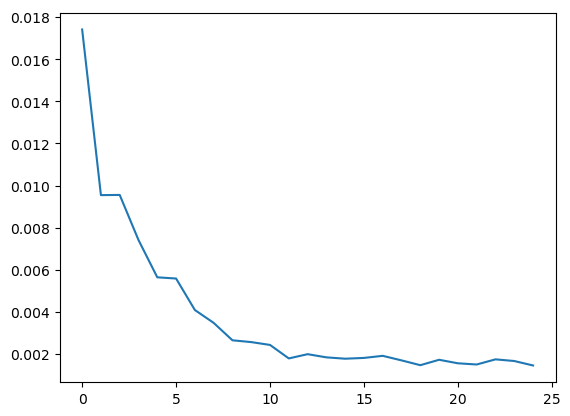

In [28]:
my_loss = model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [29]:
#12 history steps  --> steps 13
#last 12 points train --> pt 1 of test data
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [30]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [31]:
model.predict(first_eval_batch)[0]

array([0.6999883], dtype=float32)

In [32]:
#Forecast Using RNN

In [36]:
#Explanation######################

test_predictions = [] #holding my predictions

#Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
#reshape this to the format (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

In [37]:
my_first_pred = model.predict(current_batch)[0]
my_first_pred

array([0.6999883], dtype=float32)

In [38]:
current_batch#.shape

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [39]:
current_batch[:,1:,:]

array([[[0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [40]:
test_predictions = [] #holding my predictions

#Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
#reshape this to the format (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

#How far will I forecast?
# len(test) -swap with---> 24 (for 1 year into future past data)
for i in range(len(test)):
    #one step ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    #store prediction
    test_predictions.append(current_pred)
    #Update current batch to include prediction at end 
    #At every step, remove the topmost element and append a predicted element
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)#'1:' grabs everything except first element

In [41]:
test_predictions

[array([0.6999883], dtype=float32),
 array([0.8227491], dtype=float32),
 array([0.77339506], dtype=float32),
 array([0.9284794], dtype=float32),
 array([0.98730993], dtype=float32),
 array([0.76536024], dtype=float32),
 array([0.9022625], dtype=float32),
 array([0.79077244], dtype=float32),
 array([0.86074954], dtype=float32),
 array([0.9008743], dtype=float32),
 array([0.9568398], dtype=float32),
 array([0.6120015], dtype=float32)]

In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [43]:
test['Predictions'] = true_predictions

/home/shishir/anaconda3/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


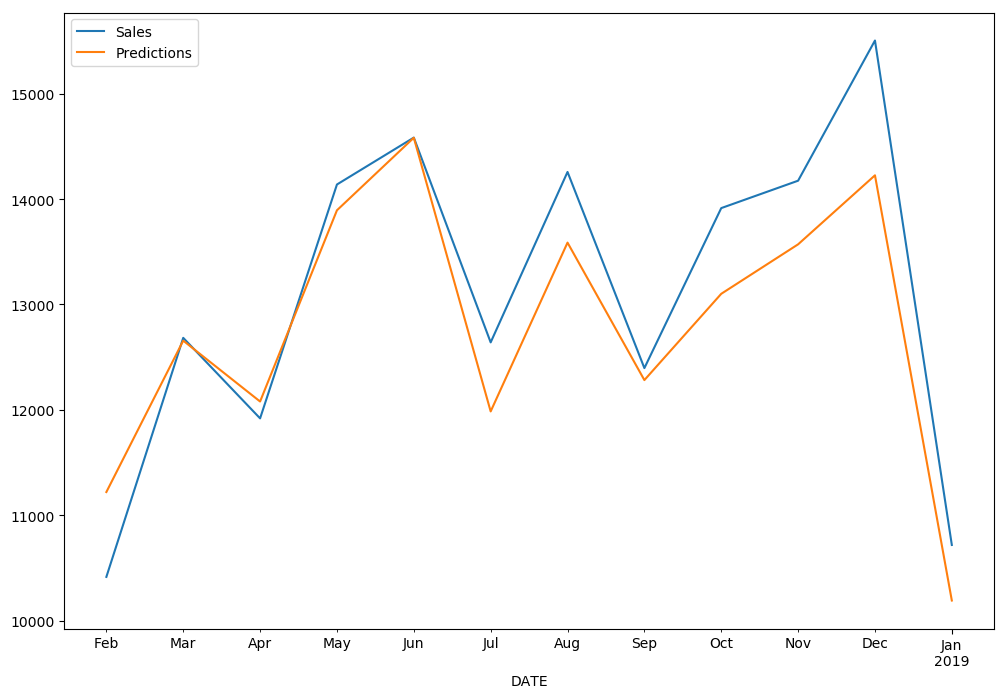

In [44]:
test.plot(figsize=(12,8))

In [45]:
model.save('mycoolmodel.h5')

In [46]:
pwd

'/home/shishir/Documents/Time_Series_Analysis/Deep_Learning'

In [1]:
from tensorflow.keras.models import load_model

In [6]:
new_model = load_model("mycoolmodel.h5")